In [1]:
import numpy as np
import cv2
import math
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def mean(a):
    a=np.array(a)
    m=(np.sum(a))/a.size
    return m

def ncc(g,f):
    f = np.array(f)
    g = np.array(g)

    meanG=mean(g)
    meanF=mean(f)
    
    f1=f-meanF
    g1=g-meanG
    
    s=np.sum(np.multiply(f1,g1))
    m=(np.sum(g1**2)*np.sum(f1**2))**0.5
 
    if m!=0:
        NCC=s/m 
    else :
        NCC=100
        
    return NCC

def imageNcc(G,F):
    b=ncc(G[:,:,0],F[:,:,0])
    g=ncc(G[:,:,0],F[:,:,0])
    r=ncc(G[:,:,0],F[:,:,0])
    
    result=(b+g+r)/3
    
    return result

In [3]:
def downScale(img,n):
    width = int(img.shape[1]/n)
    height = int(img.shape[0]/n)
    dim = (width, height)
    e=np.uint8(img)
    resized = cv2.resize(e, dim, interpolation = cv2.INTER_AREA)
    return resized

In [4]:
def slidingWindow(image,template,step):
    height=template.shape[0]
    width=template.shape[1]
    result_list=[]
    
    for x in range(0, image.shape[1] - width , step):
        for y in range(0, image.shape[0] - height, step):
            window = image[y:y + height,x:x + width , :]
            r=imageNcc(template,window)
            result_list.append([r,x,y])
  
    return result_list

In [6]:
patch=cv2.imread('patch.png')
patch=downScale(patch,2)
image=cv2.imread('Greek_ship.jpg')

In [9]:
array=slidingWindow(image,patch,7)
print(array)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(2863, 1393)
(3283, 1358)


True

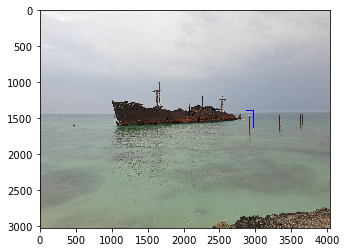

In [10]:
i=0
xresults=[]
yresults=[]
image=cv2.imread('Greek_ship.jpg')
for row in array:
    if row[0]>0.65:
        xresults.append(array[i][1])
        yresults.append(array[i][2])
    i=i+1
    
tmpx=0
tmpy=0
for x,y in zip(xresults,yresults):
    if (x-tmpx>30) | (y-tmpy>100):
        print(x,y)
        cv2.rectangle(image, (x,y), (x+patch.shape[1],y+patch.shape[0]), (255,0,0), 2) 
        tmpx=x
        tmpy=y
        
final= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(final)   
cv2.imwrite("res03.jpg",image)